<a href="https://colab.research.google.com/github/Jair-pc/Dio-Projeto_Transfer_Learning_Python/blob/main/Projeto_de_Transfer_Learning_em_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Geração Tech Unimed-BH - Ciência de Dados**

**O bootcamp Unimed-BH Ciência de Dados é para profissionais que já atuam com ciência de dados ou estão começando na carreira. Durante o programa, você vai ter experiências educacionais com Python, banco de dados relacional e não relacional, além de uma imersão Cloud Computer e Machine Learning. Após gerar a certificação de conclusão do bootcamp, a Unimed-BH pretende recrutar talentos para integrar seus times de tecnologia.**

**Ney Ribeiro**

#**Projeto Treinamento de Redes Neurais com Transfer Learning**




**O projeto consiste em aplicar o método de Transfer Learning em uma rede de Deep Learning na linguagem Python no ambiente COLAB.**

In [2]:
# Importando os pacotes necessários

%matplotlib inline

import os
import random
import numpy as np
import keras
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model

from six.moves import urllib
import gzip

from shutil import copyfile

# import the needed packages
# import matplotlib.pyplot as plt
import matplotlib.image as img
from tensorflow import keras

### **Carregando os dados do Link da Microsoft**

In [3]:
# Baixando o conjunto de dados de cães e gatos

!echo "Downloading catsanddogs for image notebooks"
!curl -L -o kagglecatsanddogs_5340.zip --progress-bar https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip #download

# As instruções para preparar o conjunto de dados são para Linux ou macOS

!unzip kagglecatsanddogs_5340.zip
!rm kagglecatsanddogs_5340.zip
!ls

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  
  inflating: PetImages/Dog/55

### **Exploração e limpeza dos dados**

In [4]:
# exibindo a quantidade de imagem 

print(len(os.listdir('/content/PetImages/Cat')))
print(len(os.listdir('/content/PetImages/Dog')))


12501
12501


In [5]:
# Crinando diretórios para separar as imagens em Treino e Teste

try:
    os.mkdir('cats-v-dogs')
    os.mkdir('cats-v-dogs/training')
    os.mkdir('cats-v-dogs/testing')
    os.mkdir('cats-v-dogs/training/cats')
    os.mkdir('cats-v-dogs/training/dogs')
    os.mkdir('cats-v-dogs/testing/cats')
    os.mkdir('cats-v-dogs/testing/dogs')
except OSError:
    pass

In [6]:
#  Função para separar o conjunto de dados em treino e teste
#  E limpando as imagens com comprimento zero

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


CAT_SOURCE_DIR = "PetImages/Cat/"
TRAINING_CATS_DIR = "cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "PetImages/Dog/"
TRAINING_DOGS_DIR = "cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


In [7]:
# exibindo a quantidade de imagem por diretórios


print(len(os.listdir('cats-v-dogs/training/cats/')))
print(len(os.listdir('cats-v-dogs/training/dogs/')))
print(len(os.listdir('cats-v-dogs/testing/cats/')))
print(len(os.listdir('cats-v-dogs/testing/dogs/')))

11250
11250
1250
1250


In [8]:
# define e move para o diretório do dataset
datasetdir = '/content/PetImages'
os.chdir(datasetdir)


# atalho para a classe ImageDataGenerator
ImageDataGenerator = keras.preprocessing.image.ImageDataGenerator

### **Transformando e exibindo os dados**

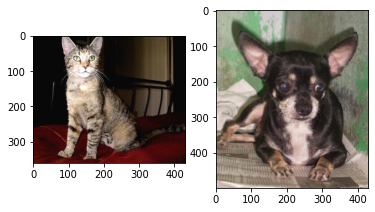

In [9]:
plt.subplot(1,2,1)
plt.imshow(img.imread('Cat/10000.jpg'))
plt.subplot(1,2,2)
plt.imshow(img.imread('Dog/10722.jpg'))

In [10]:
images = []
for i in range(10):
  im = img.imread('Cat/660.jpg'.format(i))
  images.append(im)
  print('image shape', im.shape, 'maximum color level', im.max())

image shape (346, 259, 4) maximum color level 255
image shape (346, 259, 4) maximum color level 255
image shape (346, 259, 4) maximum color level 255
image shape (346, 259, 4) maximum color level 255
image shape (346, 259, 4) maximum color level 255
image shape (346, 259, 4) maximum color level 255
image shape (346, 259, 4) maximum color level 255
image shape (346, 259, 4) maximum color level 255
image shape (346, 259, 4) maximum color level 255
image shape (346, 259, 4) maximum color level 255


In [11]:
# função auxiliar para carregar a imagem e devolvê-la e inserir o vetor
def get_image(path):
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

Agora precisamos transformar nossas imagens,  em arquivos de disco, em lotes de matrizes de dados na memória que possam ser alimentadas na rede durante o treinamento.

O ImageDataGenerator pode ser facilmente usado para essa finalidade. Vamos importar esta classe e criar uma instância do gerador:

In [12]:
gen = ImageDataGenerator()


Agora, usaremos o método flow_from_directory gen do objeto para iniciar a geração de lotes.

Este método retornará um iterador que retornará um lote toda vez que for iterado. Para ver como os dados estão organizados, podemos simplesmente criar esse iterador e obter um primeiro lote para examiná-lo:

In [13]:
iterator = gen.flow_from_directory(
    os.getcwd(), 
    target_size=(256,256), 
    classes=('Dog','Cat')
)

# Encontrado 25000 imagens pertencentes a 2 classes.

Found 25000 images belonging to 2 classes.


In [14]:
# podemos adivinhar que o iterador tem uma próxima função,
# porque todos os iteradores python têm um.
 
batch = iterator.next()
len(batch)

2

In [15]:
# Vereficando os tipos lote dos dois elementos

print(type(batch[0]))
print(type(batch[1]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [16]:
# Imprimindo a forma e o tipo das duas matrizes numpy.

print(batch[0].shape)
print(batch[0].dtype)
print(batch[0].max())
print(batch[1].shape)
print(batch[1].dtype)

(32, 256, 256, 3)
float32
255.0
(32, 2)
float32


Obviamente, o primeiro elemento é um array de 32 imagens com 256x256 pixels e 3 canais de cores, codificados como floats no intervalo de 0 a 255. Portanto, o ImageDataGenerator forçou a imagem para 256x256 pixels conforme solicitado, mas não normalizou a cor níveis entre 0 e 1. Teremos que fazer isso mais tarde.

O segundo elemento contém os 32 rótulos correspondentes.

Antes de dar uma olhada detalhada nos rótulos, podemos plotar a primeira imagem:

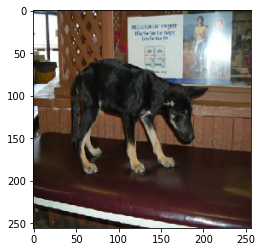

In [17]:
# precisamos converter o array de imagens para inteiros
# antes de plotar como imshow ou pega arrays de inteiros,
# ou arrays de floats normalizados para 1.

plt.imshow(batch[0][0].astype(int))

In [18]:
batch[1][0]

array([1., 0.], dtype=float32)

Para validar os rótulos do conjunto de dados, queremos verificar se, para alguns lotes, os rótulos estão definidos corretamente. Portanto, precisamos de uma função que possa plotar um número bastante grande de imagens e rotulá-las. Aqui está:

In [19]:
def plot_images(batch):
    imgs = batch[0]
    labels = batch[1]
    ncols, nrows = 4,8
    fig = plt.figure( figsize=(ncols*3, nrows*3), dpi=90)
    for i, (img,label) in enumerate(zip(imgs,labels)):
      plt.subplot(nrows, ncols, i+1)
      plt.imshow(img.astype(int))
      assert(label[0]+label[1]==1.)
      categ = 'Dog' if label[0]>0.5 else 'Cat'
      plt.title( '{} {}'.format(str(label), categ))
      plt.axis('off')

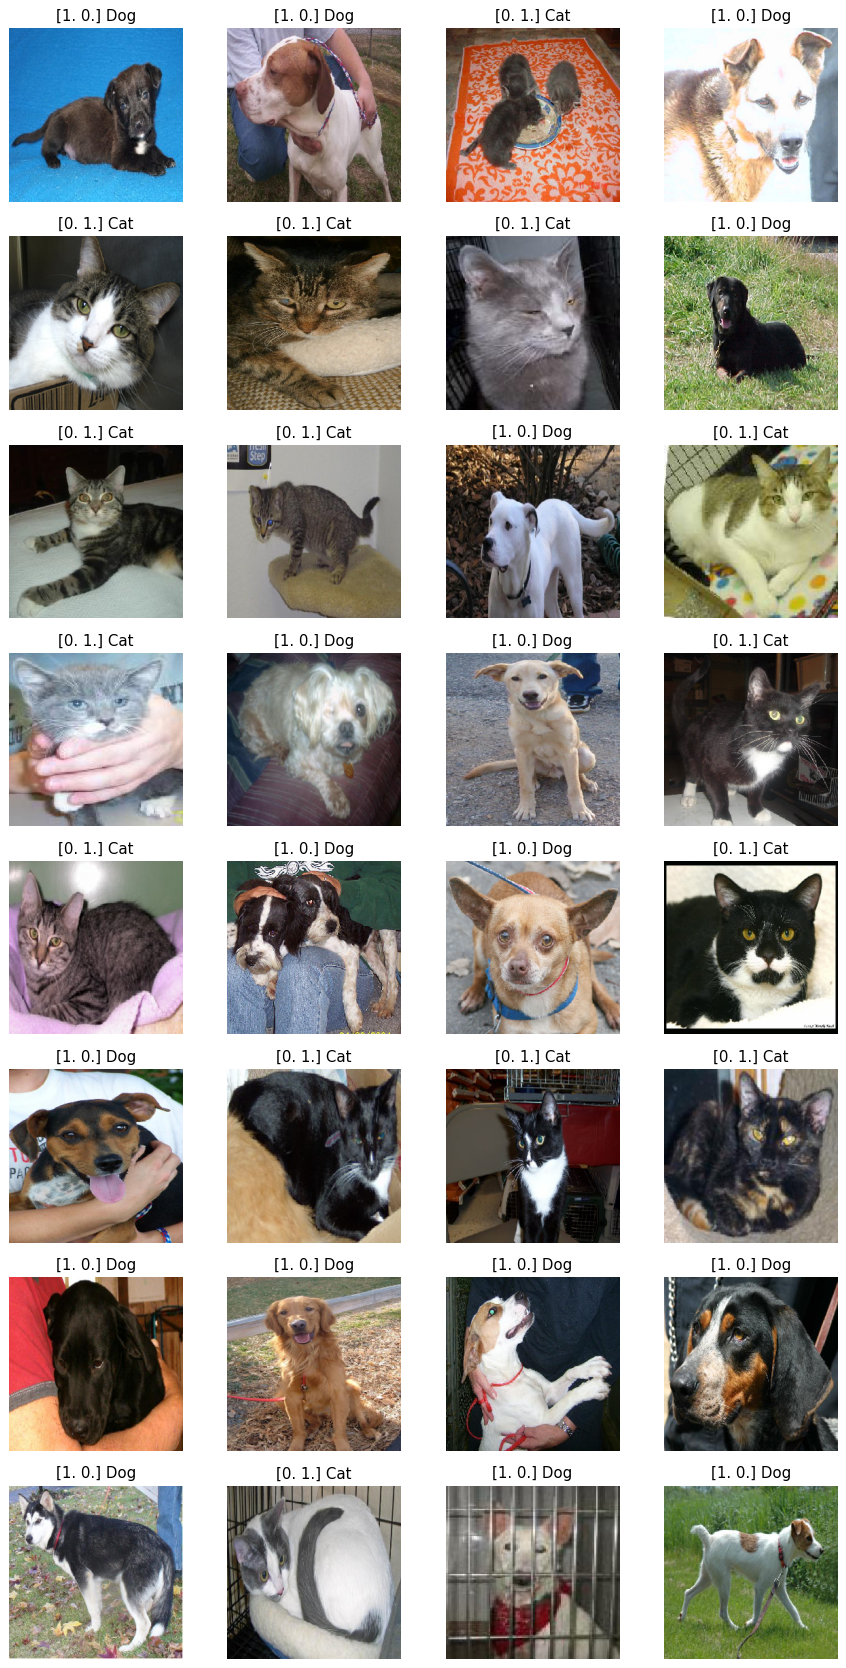

In [20]:
plot_images(iterator.next())


### **Treinando o conjuto de dados**

In [21]:
# Dividindo as amostras de treinamento e validação com ImageDataGenerator

imgdatagen = ImageDataGenerator(
    rescale = 1/255., 
    validation_split = 0.2,
)

In [22]:


batch_size = 8
height, width = (256,256)

TRAINING_DIR = "/content/cats-v-dogs/training/"
train_dataset = imgdatagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (height, width), 
    classes = ('dogs','cats'),
    batch_size = batch_size,
    subset = 'training'
)

VALIDATION_DIR = "/content/cats-v-dogs/testing/"
val_dataset = imgdatagen.flow_from_directory(
    VALIDATION_DIR,
    target_size = (height, width), 
    classes = ('dogs','cats'),
    batch_size = batch_size,
    subset = 'validation'
)

Found 18000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [23]:
# rede neural convolucional simples
# As redes neurais convolucionais profundas são a escolha certa quando se trata de classificar imagens

model = keras.models.Sequential()

initializers = {
    
}
model.add( 
    keras.layers.Conv2D(
        24, 5, input_shape=(256,256,3), 
        activation='relu', 
    )
)
model.add( keras.layers.MaxPooling2D(2) )
model.add( 
    keras.layers.Conv2D(
        48, 5, activation='relu', 
    )
)
model.add( keras.layers.MaxPooling2D(2) )
model.add( 
    keras.layers.Conv2D(
        96, 5, activation='relu', 
    )
)
model.add( keras.layers.Flatten() )
model.add( keras.layers.Dropout(0.9) )

model.add( keras.layers.Dense(
    2, activation='softmax',
    )
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 24)      1824      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 24)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 48)      28848     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 48)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 57, 57, 96)        115296    
                                                                 
 flatten (Flatten)           (None, 311904)            0

In [24]:
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adamax(learning_rate=0.001),
              metrics=['acc'])

In [25]:
history = model.fit(
    train_dataset, 
    validation_data = val_dataset,
    workers=10,
    epochs=10,
)

Epoch 1/10
 720/2250 [========>.....................] - ETA: 49s - loss: 0.6522 - acc: 0.5991

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

2250/2250 [==============================] - 84s 33ms/step - loss: 0.6031 - acc: 0.6639 - val_loss: 0.5221 - val_acc: 0.7440
Epoch 2/10
2250/2250 [==============================] - 75s 33ms/step - loss: 0.5253 - acc: 0.7384 - val_loss: 0.4618 - val_acc: 0.7780
Epoch 3/10
2250/2250 [==============================] - 75s 33ms/step - loss: 0.4669 - acc: 0.7800 - val_loss: 0.4370 - val_acc: 0.7840
Epoch 4/10
2250/2250 [==============================] - 75s 33ms/step - loss: 0.4273 - acc: 0.8063 - val_loss: 0.4344 - val_acc: 0.7840
Epoch 5/10
2250/2250 [==============================] - 74s 33ms/step - loss: 0.3940 - acc: 0.8256 - val_loss: 0.3852 - val_acc: 0.8220
Epoch 6/10
2250/2250 [==============================] - 75s 33ms/step - loss: 0.3688 - acc: 0.8402 - val_loss: 0.3716 - val_acc: 0.8380
Epoch 7/10
2250/2250 [==============================] - 75s 33ms/step - loss: 0.3480 - acc: 0.8512 - val_loss: 0.3617 - val_acc: 0.8480
Epoch 8/10
2250/2250 [==============================] - 75s

### **Exibindo o resultados do treinamento**

Agora que o treinamento está feito, precisamos de uma maneira de ver como o treinamento funcionou. Para isso, essa pequena função para plotar a perda e a precisão dos conjuntos de dados de treinamento e validação, em função da época

In [26]:
def plot_history(history, yrange):
    '''Plot loss and accuracy as a function of the epoch,
    for the training and validation datasets.
    '''
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get number of epochs
    epochs = range(len(acc))

    # Plot training and validation accuracy per epoch
    plt.plot(epochs, acc)
    plt.plot(epochs, val_acc)
    plt.title('Training and validation accuracy')
    plt.ylim(yrange)
    
    # Plot training and validation loss per epoch
    plt.figure()

    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Training and validation loss')
    
    plt.show()

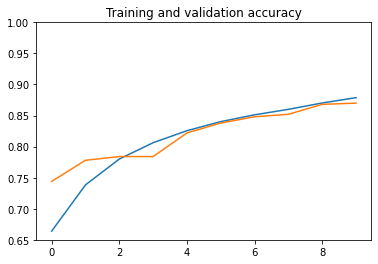

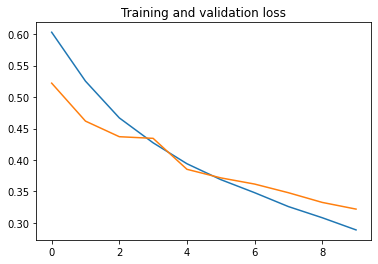

In [27]:
plot_history(history, (0.65, 1.))


### **Aumento de dados**

O aumento de dados consiste em gerar novos exemplos de treinamento a partir dos já existentes, de forma a aumentar artificialmente o tamanho da amostra de treinamento. Isso é muito fácil de fazer com o ImageDataGenerator. Por exemplo, podemos começar virando aleatoriamente para a esquerda e para a direita em nossas imagens

In [28]:
imgdatagen = ImageDataGenerator(
    rescale = 1/255., 
    horizontal_flip = True, 
    validation_split = 0.2,
)

Resultado da transformação em uma determinada imagem

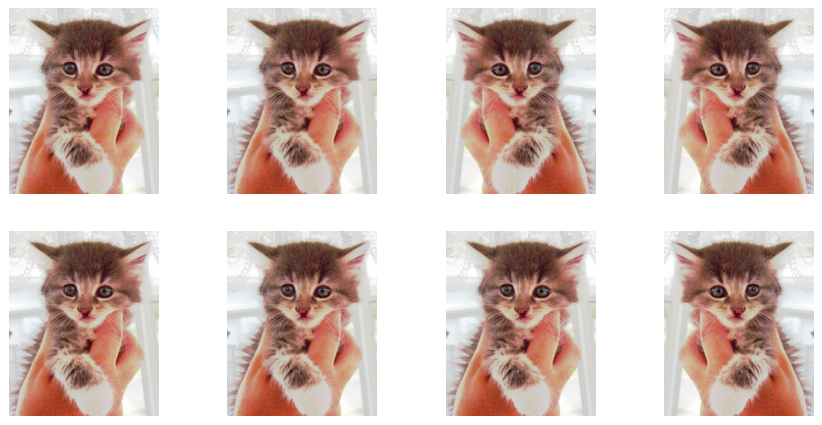

In [29]:
image = img.imread('Cat/100.jpg')

def plot_transform():
    '''apply the transformation 8 times randomly'''
    nrows, ncols = 2,4
    fig = plt.figure(figsize=(ncols*3, nrows*3), dpi=90)
    for i in range(nrows*ncols): 
        timage = imgdatagen.random_transform(image)
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(timage)
        plt.axis('off')
        
plot_transform()

Transformação um pouco mais complexa. o ImageDataGenerator irá inverter, ampliar e girar as imagens de forma aleatória

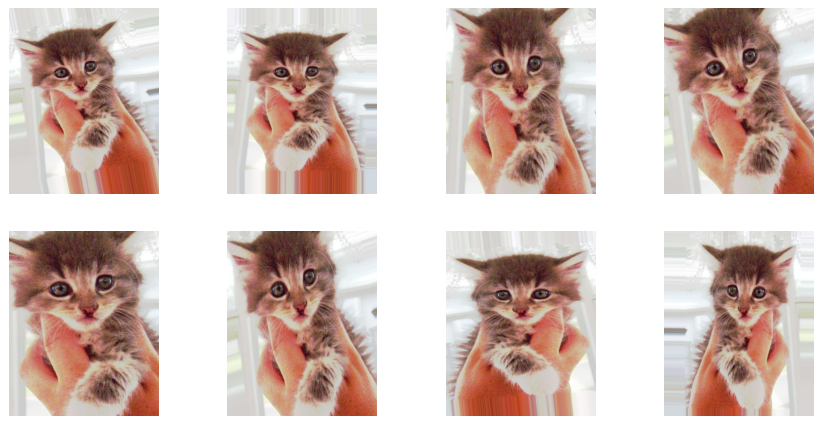

In [30]:
imgdatagen = ImageDataGenerator(
    rescale = 1/255., 
    horizontal_flip = True, 
    zoom_range = 0.3, 
    rotation_range = 15.,
    validation_split = 0.1,
)

plot_transform()


Vimos que essas transformações produzem novas imagens perfeitamente aceitáveis. Então, vamos treinar novamente a rede com aumento de dados. É importante notar que, devido à natureza aleatória das transformações, a rede verá cada imagem apenas uma vez. Podemos, portanto, esperar que será difícil para a rede overfitting.

In [31]:
batch_size = 8
height, width = (256,256)

TRAINING_DIR = "/content/cats-v-dogs/training/"
train_dataset = imgdatagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (height, width), 
    classes = ('dogs','cats'),
    batch_size = batch_size,
    subset = 'training'
)

VALIDATION_DIR = "/content/cats-v-dogs/testing/"
val_dataset = imgdatagen.flow_from_directory(
    VALIDATION_DIR,
    target_size = (height, width), 
    classes = ('dogs','cats'),
    batch_size = batch_size,
    subset = 'validation'
)

Found 20250 images belonging to 2 classes.
Found 250 images belonging to 2 classes.


In [32]:
model = keras.models.Sequential()

initializers = {
    
}
model.add( 
    keras.layers.Conv2D(
        24, 5, input_shape=(256,256,3), 
        activation='relu', 
    )
)
model.add( keras.layers.MaxPooling2D(2) )
model.add( 
    keras.layers.Conv2D(
        48, 5, activation='relu', 
    )
)
model.add( keras.layers.MaxPooling2D(2) )
model.add( 
    keras.layers.Conv2D(
        96, 5, activation='relu', 
    )
)
model.add( keras.layers.Flatten() )
model.add( keras.layers.Dropout(0.2) )

model.add( keras.layers.Dense(
    2, activation='softmax',
    )
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 252, 252, 24)      1824      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 126, 126, 24)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 122, 122, 48)      28848     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 61, 61, 48)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 57, 57, 96)        115296    
                                                                 
 flatten_1 (Flatten)         (None, 311904)           

In [33]:
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adamax(learning_rate=0.001),
              metrics=['acc'])

In [34]:
history_augm = model.fit(
    train_dataset, 
    validation_data = val_dataset,
    workers=10,
    epochs=40,
)

Epoch 1/40
2532/2532 [==============================] - 277s 109ms/step - loss: 0.6027 - acc: 0.6642 - val_loss: 0.5569 - val_acc: 0.7320
Epoch 2/40
2532/2532 [==============================] - 273s 107ms/step - loss: 0.5255 - acc: 0.7389 - val_loss: 0.5249 - val_acc: 0.7400
Epoch 3/40
2532/2532 [==============================] - 273s 108ms/step - loss: 0.4744 - acc: 0.7770 - val_loss: 0.4268 - val_acc: 0.8200
Epoch 4/40
2532/2532 [==============================] - 271s 107ms/step - loss: 0.4405 - acc: 0.7998 - val_loss: 0.4177 - val_acc: 0.8080
Epoch 5/40
2532/2532 [==============================] - 272s 107ms/step - loss: 0.4114 - acc: 0.8147 - val_loss: 0.3705 - val_acc: 0.8360
Epoch 6/40
2532/2532 [==============================] - 271s 107ms/step - loss: 0.3750 - acc: 0.8379 - val_loss: 0.3998 - val_acc: 0.8080
Epoch 7/40
2532/2532 [==============================] - 271s 107ms/step - loss: 0.3527 - acc: 0.8463 - val_loss: 0.4199 - val_acc: 0.8160
Epoch 8/40
2532/2532 [============

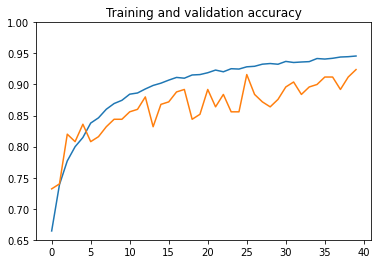

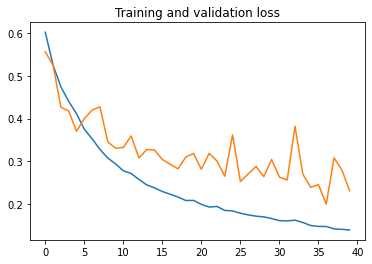

In [54]:
plot_history(history_augm, (0.65, 1))


# Exporte seu modelo

In [120]:
import time
t = time.time()

export_path = "/tmp/saved_models/{}".format(int(t))
model.save(export_path, save_format='tf')

export_path

'/tmp/saved_models/1666740765'